### Midterm Kaggle Assignment




In [1]:
import pandas as pd
import re
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%pylab inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Populating the interactive namespace from numpy and matplotlib


In [9]:
#reading the data from disk into memory
df_Test = pd.read_csv("C:\\Users\\TVita\\Documents\\GitHub\\Data-Science-Essentials\\stuff\\midterm_test.csv")
df_Train = pd.read_csv("C:\\Users\\TVita\\Documents\\GitHub\\Data-Science-Essentials\\stuff\\midterm_train.csv")

In [10]:
X_Test = pd.DataFrame()
X_Train = pd.DataFrame()
Result = pd.DataFrame()

#Result Frame
Result['ID'] = df_Test['Unnamed: 0']

#Train data
X_Train['Rate'] = df_Train.Interest_Rate
X_Train['Amount_Requested'] = df_Train.Loan_Amount_Requested
X_Train['Amount_Funded'] = df_Train.Loan_Amount_Funded
X_Train['Amount_by_Investors'] = df_Train.Loan_Amount_Funded_by_Investors
X_Train['Monthly_Payment'] = df_Train.Monthly_Payment
X_Train['Income'] = df_Train.Annual_Income
X_Train['D2I'] = df_Train.Debt_To_Income
X_Train['Monthly_Payment'] = df_Train.Monthly_Payment

#Test Data
X_Test['Amount_Requested'] = df_Test.Loan_Amount_Requested
X_Test['Amount_Funded'] = df_Test.Loan_Amount_Funded
X_Test['Amount_by_Investors'] = df_Test.Loan_Amount_Funded_by_Investors
X_Test['Monthly_Payment'] = df_Test.Monthly_Payment
X_Test['Income'] = df_Test.Annual_Income
X_Test['D2I'] = df_Test.Debt_To_Income
X_Test['Monthly_Payment'] = df_Test.Monthly_Payment

In [11]:
X_Test.head()

,Amount_Requested,Amount_Funded,Amount_by_Investors,Monthly_Payment,Income,D2I
0,"$6,000","$6,000","$5,950",202.14,32000.0,32.15
1,"$4,375","$4,375","$4,375",161.53,45000.0,14.59
2,"$17,500","$17,500","$17,500",413.03,80000,14.99
3,"$10,625","$10,625","$10,625",342.79,NaN,10.39
4,"$16,000","$16,000","$16,000",541.81,50000,31.87


In [12]:
X_Train.head()

,Rate,Amount_Requested,Amount_Funded,Amount_by_Investors,Monthly_Payment,Income,D2I
0,11.89%,"$25,000","$25,000","$19,080",829.10,85000,19.48
1,10.71%,"$7,000","$7,000",$673,228.22,65000,14.29
2,16.99%,"$25,000","$25,000","$24,725",891.20,70000,10.5
3,13.57%,"$10,800","$10,800","$10,692",366.86,32000,11.63
4,19.05%,"$7,200","$7,200","$7,200",264.11,58000,2.05


In [13]:
X_Train['Amount_Requested'] =X_Train['Amount_Requested'].map(lambda x: x.lstrip('$').replace(',',''))
X_Train['Amount_Funded'] = X_Train['Amount_Funded'].map(lambda x: x.lstrip('$').replace(',',''))
X_Train['Amount_by_Investors'] = X_Train['Amount_by_Investors'].map(lambda x: x.lstrip('$').replace(',',''))

X_Test['Amount_Requested'] = X_Test['Amount_Requested'].map(lambda x: x.lstrip('$').replace(',',''))
X_Test['Amount_Funded'] = X_Test['Amount_Funded'].map(lambda x: x.lstrip('$').replace(',',''))
X_Test['Amount_by_Investors'] = X_Test['Amount_by_Investors'].map(lambda x: x.lstrip('$').replace(',',''))

In [14]:
def fmt(x):
    try:
        return float(x.strip('%'))/100
    except:
        return float(-.01)
    
def check(x):
    try:
        return float(re.sub(r"[^0-9\.]+", "", x))
    except:
        return float(-1)   

def percent(x):
    try:
        return float(x)/100
    except:
        return float(-.01)

In [15]:
#Format Training Data
X_Train.Rate = X_Train.Rate.map(fmt)
X_Train.D2I = X_Train.D2I.map(check)
X_Train.D2I = X_Train.D2I.map(percent)
X_Train.Income = X_Train.Income.map(check)
X_Train.Amount_Requested = X_Train.Amount_Requested.map(check)
X_Train.Amount_Funded = X_Train.Amount_Funded.map(check)
X_Train.Amount_by_Investors = X_Train.Amount_by_Investors.map(check)
X_Train.Monthly_Payment = X_Train.Monthly_Payment.map(check)

#Format Test Data
X_Test.D2I = X_Test.D2I.map(check)
X_Test.D2I = X_Test.D2I.map(percent)
X_Test.Income = X_Test.Income.map(check)
X_Test.Amount_Requested = X_Test.Amount_Requested.map(check)
X_Test.Amount_Funded = X_Test.Amount_Funded.map(check)
X_Test.Amount_by_Investors = X_Test.Amount_by_Investors.map(check)
X_Test.Monthly_Payment = X_Test.Monthly_Payment.map(check)

In [16]:
y = X_Train.pop("Rate")

In [26]:
scaler = StandardScaler()
A = scaler.fit_transform(X_Train)
B = scaler.fit_transform(X_Test)

In [18]:
 y = np.array(y).astype(float)

In [19]:
#build test and training sets
A_train, A_test, y_train, y_test = train_test_split(A, y, test_size=0.2, random_state=42)

In [27]:
lin = LinearRegression() #initialize regressor                                                                                                                   

lin.fit(A_train, y_train) #fit training data                                                                                                                                  
preds = lin.predict(B) #make prediction on X test set     


In [28]:
preds

array([ 0.10941949,  0.10715341,  0.11610821, ...,  0.11763259,
        0.12655851,  0.11250831])

In [29]:
Result['Rate'] = preds

In [30]:
Result.head()

,ID,Rate
0,0,0.109419
1,1,0.107153
2,2,0.116108
3,3,0.115665
4,4,0.116880


In [31]:
Result.to_csv("C:\\Users\\TVita\\Documents\\GitHub\\Data-Science-Essentials\\stuff\\submission.csv", index=False)

In [36]:
log = LogisticRegression() #initialize regressor                                                                                                                   

log.fit(A_train, y_train) #fit training data                                                                                                                                  
preds = log.predict(B) #make prediction on X test set     

ValueError: Unknown label type: array([ 0.1335,  0.2376,  0.1335, ...,  0.162 , -0.01  ,  0.1678])

In [74]:
print metrics.mean_absolute_error(y_test, preds) #evaluate performance 

9.59943567662e+25


In [75]:
print math.sqrt(metrics.mean_absolute_error(y_test, preds)) #evaluate performance 

9.79767098683e+12


In [78]:
print r2_score(y_test, preds)

-1.34668610576e+59


In [77]:
y_test

array([ 0.1099,  0.1416,  0.1269, ...,  0.1299,  0.1531,  0.1727])

In [76]:
preds

array([ 0.11764397,  0.11412308,  0.12754954, ...,  0.11710636,
        0.12069465,  0.11167932])

### Model Creation
At this point I have a test and train set defined.  I will use train to train my model and test to see how accurate the model is.

There's one problem with that though.   Lets say my model is right 70% of the time.   Is that good?  Maybe?   

I'm going to build a simple 'base rate' model to compare my logistic model to, so we can see if our logistic model is useful or not.  

Then, I'll build my logistic model.


####Base Rate Model
For my baserate model, I'm going to predict that everyone dies.

In [24]:

n_estimators = [10]
max_features = ['auto']
min_samples_split = [1]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None)

In [35]:
y_train

array([ 0.1335,  0.2376,  0.1335, ...,  0.162 , -0.01  ,  0.1678])

In [33]:
estimator.fit(A_train, y_train)

ValueError: Unknown label type: array([[ 0.079 ],
       [-0.01  ],
       [ 0.1777],
       ..., 
       [ 0.162 ],
       [-0.01  ],
       [ 0.1678]])

In [143]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(100, oob_score=True, n_jobs=-1, random_state=42,min_samples_leaf=0.2)

model.fit(X, y)

ValueError: Unknown label type: array([[ 0.1189],
       [ 0.1071],
       [ 0.1699],
       ..., 
       [ 0.1311],
       [ 0.1905],
       [ 0.1016]])

In [146]:
from sklearn import metrics  
lin = LinearRegression() #initialize regressor                                                                                                                   

lin.fit(X_train, y_train) #fit training data                                                                                                                                  
preds = lin.predict(X_test) #make prediction on X test set                                                                                                                    
                                                                                                                

print math.sqrt(metrics.mean_absolute_error(y_test, preds)) #evaluate performance 

2.7374178812e-08


In [138]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [139]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.82


### Model Comparison

Our base model wasn't very good, but it looked better than it was because of class imbalance.  There are many more 0s than 1s in our dataset, so if we just guess 0 we can 'cheat.'

A better metric for binary classifer comparisons is AUC or area under the curve. 

Closely related is [precision and recall](http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html).

Precision is the fraction of correctly identified examples of a class (ratio of true positives to all positives).

Recall is the fraction of observastions classified in that class that was correctly classified.  

Think of fishing with a net for tuna.   
*  If our net is very precise, and has high recall it will catch any and all tuna and ONLY tuna.
*  If our net is very precise, but has low recall then we might catch one tuna, but most will escape.
*  If our net is low precision, but has high recall, then we might catch tuna, but also any other fish around
*  If our net is low precision, and low recall, then we should probably give up fishing.   


In [141]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report



In [142]:
print "---Base Model---"
#base rate AUC
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print "Base Rate AUC = %2.2f" % base_roc_auc
print classification_report(y_test,base_rate_model(X_test) )
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.59      1.00      0.74       105
          1       0.00      0.00      0.00        74

avg / total       0.34      0.59      0.43       179



---Logistic Model---
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.83      0.88      0.85       105
          1       0.81      0.74      0.77        74

avg / total       0.82      0.82      0.82       179



C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [143]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

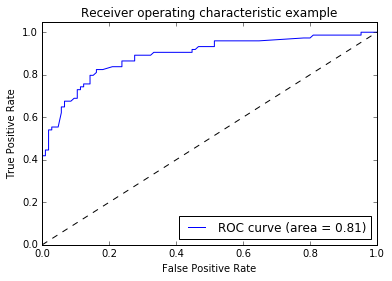

In [144]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()